In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-25-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-25-2022.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/28/22,7/29/22,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,185393,185481,185552,185749,185930,186120,186393,186697,187037,187109
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,309278,310362,311381,312097,312375,313582,314561,315337,316145,316976
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,267194,267287,267374,267454,267546,267657,267777,267902,268033,268141
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45508,45508,45508,45508,45508,45508,45793,45793,45793,45793
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102301,102301,102636,102636


In [5]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 932 entries, Province/State to 8/6/22
dtypes: float64(2), int64(928), object(2)
memory usage: 2.0+ MB


In [6]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/28/22,7/29/22,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22
count,283.000000,283.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02
mean,20.177865,22.331691,1.954386,2.305263,3.312281,5.042105,7.438596,10.277193,19.578947,21.645614,...,2.017157e+06,2.021983e+06,2.023994e+06,2.025866e+06,2.029059e+06,2.033168e+06,2.037191e+06,2.042165e+06,2.045366e+06,2.049784e+06
std,25.823619,76.018064,26.356334,26.453150,32.934485,45.839489,64.063684,86.317566,211.793095,213.098397,...,7.369459e+06,7.384226e+06,7.387939e+06,7.390769e+06,7.403395e+06,7.413077e+06,7.427915e+06,7.441932e+06,7.452351e+06,7.463690e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.715658,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.173000e+04,1.172400e+04,1.172400e+04,1.172400e+04,1.172400e+04,1.173000e+04,1.173000e+04,1.173000e+04,1.173100e+04,1.173100e+04
50%,21.694000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.217300e+04,9.257500e+04,9.257500e+04,9.257500e+04,9.257500e+04,9.257500e+04,9.284100e+04,9.355900e+04,9.409300e+04,9.460100e+04
75%,40.788284,86.666250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.880040e+05,9.892200e+05,9.904000e+05,9.915640e+05,9.926520e+05,9.936840e+05,9.940370e+05,9.940370e+05,9.940370e+05,9.940370e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,9.115671e+07,9.131504e+07,9.132945e+07,9.133144e+07,9.150243e+07,9.158881e+07,9.179453e+07,9.196152e+07,9.209046e+07,9.219738e+07


In [7]:
confirmed_df.shape

(285, 932)

In [8]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/28/22,7/29/22,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7743,7743,7745,7748,7751,7751,7752,7752,7752,7752
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3538,3541,3543,3545,3548,3550,3551,3554,3557,3560
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6876,6876,6876,6876,6876,6876,6876,6877,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1912,1912,1912,1912,1912,1912,1912,1912,1917,1917


In [9]:
deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/28/22,7/29/22,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22
count,283.000000,283.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02
mean,20.177865,22.331691,0.059649,0.063158,0.091228,0.147368,0.196491,0.287719,0.459649,0.466667,...,2.244107e+04,2.245139e+04,2.245485e+04,2.245762e+04,2.246598e+04,2.247575e+04,2.249045e+04,2.250106e+04,2.251106e+04,2.251873e+04
std,25.823619,76.018064,1.006993,1.008526,1.423678,2.370454,3.081634,4.502897,7.404506,7.405017,...,8.865394e+04,8.869373e+04,8.870202e+04,8.870528e+04,8.874017e+04,8.877390e+04,8.883882e+04,8.887811e+04,8.891776e+04,8.895398e+04
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.715658,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
50%,21.694000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.700000e+02,8.700000e+02,8.700000e+02,8.700000e+02,8.730000e+02,8.730000e+02,8.730000e+02,8.740000e+02,8.740000e+02,8.740000e+02
75%,40.788284,86.666250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,1.029412e+06,1.030038e+06,1.030060e+06,1.030037e+06,1.030596e+06,1.031080e+06,1.032195e+06,1.032820e+06,1.033516e+06,1.034152e+06


In [10]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 932 entries, Province/State to 8/6/22
dtypes: float64(2), int64(928), object(2)
memory usage: 2.0+ MB


In [16]:
deaths_df.shape

(285, 932)

In [12]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-07-26 04:20:58,33.93911,67.709953,184819,7738,NaN,NaN,Afghanistan,474.767214,4.186799
1,NaN,NaN,NaN,Albania,2022-07-21 23:21:03,41.15330,20.168300,305123,3529,NaN,NaN,Albania,10213.253180,1.196596
2,NaN,NaN,NaN,Algeria,2022-07-26 04:20:58,28.03390,1.659600,266916,6876,NaN,NaN,Algeria,608.687916,2.576091
3,NaN,NaN,NaN,Andorra,2022-07-26 04:20:58,42.50630,1.521800,45326,153,NaN,NaN,Andorra,58663.042775,0.337555
4,NaN,NaN,NaN,Angola,2022-07-26 04:20:58,-11.20270,17.873900,102301,1912,NaN,NaN,Angola,311.264425,1.868994


In [13]:
latest_data.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3268.000000,3921.000000,3921.000000,4.012000e+03,4012.000000,0.0,0.0,3918.000000,3969.000000
mean,32405.943390,35.785662,-71.194102,1.423821e+05,1591.705135,NaN,NaN,24624.275329,2.723199
std,18056.381177,13.355142,55.085839,8.845865e+05,8370.375342,NaN,NaN,9263.260082,68.722854
min,60.000000,-71.949900,-178.116500,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000
25%,19048.500000,33.205219,-96.580954,3.304500e+03,43.000000,NaN,NaN,20992.225140,0.902593
50%,30068.000000,37.919235,-86.717326,9.317500e+03,121.000000,NaN,NaN,25576.804886,1.340637
75%,47041.500000,42.183322,-77.358708,4.111500e+04,419.250000,NaN,NaN,29720.534489,1.823934
max,99999.000000,71.706900,178.065000,3.264347e+07,172555.000000,NaN,NaN,166863.905325,4288.571429


In [14]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3921 non-null   float64
 6   Long_                3921 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3918 non-null   float64
 13  Case_Fatality_Ratio  3969 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.9+ KB


In [15]:
latest_data.shape

(4012, 14)

In [17]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2022-07-26 04:32:01,32.3182,-86.9023,1413426,19888,NaN,NaN,1.0,...,7957429.0,NaN,1.407078,84000001.0,USA,162291.021040,NaN,2022-07-25,NaN,NaN
1,Alaska,US,2022-07-26 04:32:01,61.3707,-152.4044,281203,1309,NaN,NaN,2.0,...,NaN,NaN,0.465500,84000002.0,USA,NaN,NaN,2022-07-25,NaN,NaN
2,American Samoa,US,2022-07-26 04:32:01,-14.2710,-170.1320,7471,33,NaN,NaN,60.0,...,NaN,NaN,0.441708,16.0,ASM,NaN,NaN,2022-07-25,NaN,NaN
3,Arizona,US,2022-07-26 04:32:01,33.7298,-111.4312,2179180,30698,NaN,NaN,4.0,...,20213642.0,NaN,1.408695,84000004.0,USA,277708.859954,NaN,2022-07-25,NaN,NaN
4,Arkansas,US,2022-07-26 04:32:01,34.9697,-92.3731,896275,11673,NaN,NaN,5.0,...,5344269.0,NaN,1.302390,84000005.0,USA,177091.322034,NaN,2022-07-25,NaN,NaN


In [18]:
us_medical_data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
count,56.000000,56.000000,5.800000e+01,58.000000,0.0,0.0,58.000000,56.000000,3.800000e+01,0.0,58.000000,5.800000e+01,38.000000,0.0,0.0,0.0
mean,36.840089,-85.206614,1.562230e+06,17716.034483,NaN,NaN,3288.086207,27194.064583,2.184577e+07,NaN,1.057516,7.676194e+07,294864.993048,NaN,NaN,NaN
std,10.887035,49.754449,1.966316e+06,21511.563493,NaN,NaN,17408.350591,4433.582589,3.378493e+07,NaN,0.419263,2.378302e+07,165207.821051,NaN,NaN,NaN
min,-14.271000,-170.132000,4.900000e+01,0.000000,NaN,NaN,1.000000,13427.149045,4.463260e+05,NaN,0.000000,1.600000e+01,0.000025,NaN,NaN,NaN
25%,34.594600,-101.165775,3.012222e+05,2965.500000,NaN,NaN,18.250000,24910.884194,4.432357e+06,NaN,0.842713,8.400001e+07,184623.449183,NaN,NaN,NaN
50%,39.061850,-87.944200,8.828705e+05,11431.000000,NaN,NaN,32.500000,27771.211767,1.311174e+07,NaN,1.096282,8.400003e+07,281745.380009,NaN,NaN,NaN
75%,42.361650,-76.970625,1.910187e+06,21115.750000,NaN,NaN,47.750000,29711.467153,2.179931e+07,NaN,1.305537,8.400004e+07,357117.133883,NaN,NaN,NaN
max,61.370700,145.673900,1.062727e+07,93243.000000,NaN,NaN,99999.000000,38624.321643,1.782426e+08,NaN,2.912621,8.410000e+07,778020.334900,NaN,NaN,NaN


In [19]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             0 non-null      float64
 8   Active                0 non-null      float64
 9   FIPS                  58 non-null     float64
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    38 non-null     float64
 12  People_Hospitalized   0 non-null      float64
 13  Case_Fatality_Ratio   58 non-null     float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

In [20]:
# confirmed_df
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/28/22,7/29/22,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,185393,185481,185552,185749,185930,186120,186393,186697,187037,187109
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,309278,310362,311381,312097,312375,313582,314561,315337,316145,316976
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,267194,267287,267374,267454,267546,267657,267777,267902,268033,268141
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45508,45508,45508,45508,45508,45508,45793,45793,45793,45793
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102301,102301,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,682096,682096,682096,682096,682096,691065,691065,691065,691065,691065
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11849,11849,11877,11877,11877,11877,11877,11895,11895,11895
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,329483,329483,329483,329483,329483,330575,330575,330575,331074,331074


In [23]:
confirmed_df['Country/Region'].value_counts().nlargest(20)

China               34
Canada              16
United Kingdom      14
France              12
Australia            8
Netherlands          5
Denmark              3
New Zealand          2
Palau                1
Nicaragua            1
Niger                1
Nigeria              1
North Macedonia      1
Norway               1
Oman                 1
Pakistan             1
Afghanistan          1
Panama               1
Papua New Guinea     1
Peru                 1
Name: Country/Region, dtype: int64

In [33]:
sns.set_style('whitegrid')

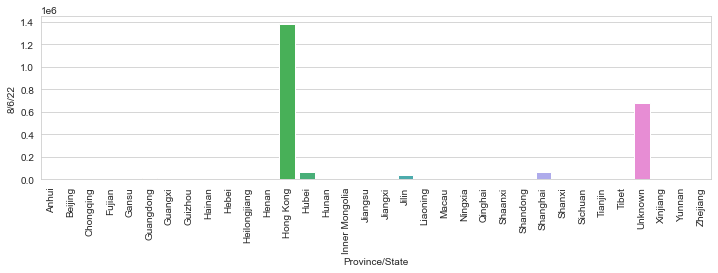

In [40]:
# number of cases by the end of date per State
plt.figure(figsize=(12,3))
ax = sns.barplot(data=confirmed_df[confirmed_df['Country/Region'] == 'China'],
            x='Province/State', y='8/6/22')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [44]:
cols = confirmed_df.keys()

In [43]:
# confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/28/22', '7/29/22', '7/30/22', '7/31/22', '8/1/22', '8/2/22',
       '8/3/22', '8/4/22', '8/5/22', '8/6/22'],
      dtype='object', length=932)

In [46]:
confirmed = confirmed_df.loc[:,cols[4]:cols[-1]]

In [47]:
deaths = deaths_df.loc[:,cols[4]:cols[-1]]

In [48]:
dates = confirmed.keys()

In [50]:
world_cases = []
world_deaths = []
mortality_rate = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    world_deaths.append(deaths_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)

In [62]:
deaths.sum()/confirmed.sum()

1/22/20    0.030521
1/23/20    0.027397
1/24/20    0.027542
1/25/20    0.029228
1/26/20    0.026415
             ...   
8/2/22     0.011055
8/3/22     0.011040
8/4/22     0.011018
8/5/22     0.011006
8/6/22     0.010986
Length: 928, dtype: float64

In [76]:
def daily_increase(data):
    d = []
    for i in range(0,len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])

    return d
# confirmed.sum()

In [95]:
def moving_average(data, window_size):
    d = []
    size = len(data)
    for i in range(size):
        if i + window_size < size:
            d.append(np.mean(data[i:i+window_size]))
        else:
            d.append(np.mean(data[i:size]))
    return d

In [97]:
window_size = 7
world_cases_daily_increase = daily_increase(world_cases)
world_confirmed_average = moving_average(world_cases, window_size=window_size)
world_daily_increase_avg = moving_average(world_cases_daily_increase, window_size=window_size)

world_deaths_daily_increase = daily_increase(world_deaths)
world_deaths_average = moving_average(world_deaths, window_size=window_size)
world_deaths_daily_average = moving_average(world_deaths_daily_increase, window_size=window_size)

In [102]:
# days since 1/22
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [105]:
world_cases = np.array(world_cases).reshape(-1,1)

In [107]:
world_deaths = np.array(world_deaths).reshape(-1,1)

In [108]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [123]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

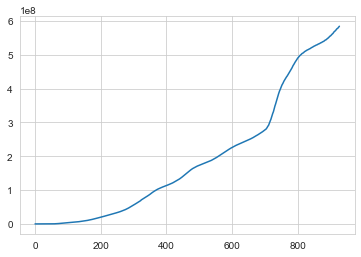

In [132]:
sns.lineplot(x=[i for i in range(len(world_cases))], y=world_cases.reshape(1,-1)[0])
plt.show()

In [133]:
days_to_skip = 790

In [144]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False)

In [146]:
X_test_confirmed

array([[916],
       [917],
       [918],
       [919],
       [920],
       [921],
       [922],
       [923],
       [924],
       [925],
       [926],
       [927]])

In [147]:
y_test_confirmed

array([[572408543],
       [573815541],
       [574889802],
       [576265018],
       [576838388],
       [577371828],
       [578281901],
       [579452832],
       [580599341],
       [582017016],
       [582929426],
       [584188544]])

In [154]:
svm_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.reshape(1,-1)[0])
predictions = svm_confirmed.predict(X_test_confirmed)

In [156]:
mean_absolute_error(y_test_confirmed, predictions)

7110491.380547166

In [158]:
mean_squared_error(predictions, y_test_confirmed)

51772063042497.21

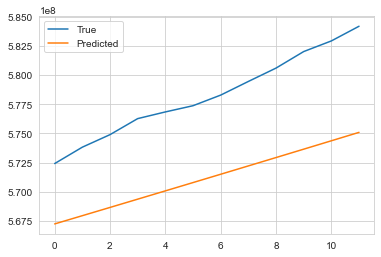

In [164]:
plt.plot(y_test_confirmed, label="True")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()